# Лабораторная работа 4. Алгоритмы на графах

### Вариант: **13**

#### Задание 1.
Найти кратчайший путь на графе между парами вершин методом динамического программирования вручную.

| Вариант | Начальная вершина | Конечная вершина | Граф |
|:---|:---|:---|:---|
| 13 | 3 | 7 | 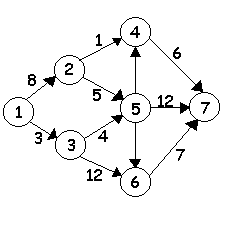 |

*Примечание: неподписанные связи будем считать равными нулю*

Начальные условия: $f_3=0$, $S_{33} = 0$.

$f_5 = \min(S_{53} + f_3) = 4 + 0 = 4;$


$f_6 = \min 
\left(
  \begin{array}{c}
  S_{63} + f_3 \\
  S_{65} + f_5 \\
  \end{array}
\right) 
= 
\min 
\left(
  \begin{array}{c}
  12 + 0 \\
  0 + 4 \\
  \end{array}
\right) = 4;$

$f_4 = \min(S_{45} + f_5) = 0 + 4 = 4;$

$f_7 = \min 
\left(
  \begin{array}{c}
  S_{74} + f_4 \\
  S_{75} + f_5 \\
  S_{76} + f_6 \\
  \end{array}
\right) 
= 
\min 
\left(
  \begin{array}{c}
  6 + 4 \\
  12 + 4 \\
  7 + 4 \\
  \end{array}
\right) = 10;$

Получаем, что кратчайший путь от вершины 3 до вершины 7: **3->5->4->7** имеет длину **10** условных единиц.

#### Задание 2.
Реализовать программно поиск кратчайшего пути на графе между парами вершин из Задания 1 методом динамического программирования.

In [30]:
def dynamic_shortest_path_finder(graph, start, end):
    """Поиск кратчайшего пути
    между двумя вершинами в графе
    методом динамического программирования."""
    def topological_sort(graph):
        visited = set()  # Множество посещенных вершин
        ordering = []  # 
        def traverse(node):
            if node not in visited:
                visited.add(node)
                for next_node in graph[node]:
                    traverse(next_node)
                ordering.append(node)
        for node in graph:
            traverse(node)
        return ordering[::-1]

    ordering = topological_sort(graph)
    
    # По умолчанию расстояния до вершин бесконечны, пути еще не проложены.
    distances = {node: float('inf') for node in graph}
    
    distances[start] = 0
    for node in ordering:
        # Обновляем расстояния между связанными вершинами
        for neighbor, weight in graph[node].items():
            distance = distances[node] + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance

    return distances[end]

my_graph = {
    1: {2: 8,
        3: 3},
    2: {4: 1,
        5: 5},
    3: {5: 4,
        6: 12},
    4: {7: 6},
    5: {4: 0,
        6: 0,
        7: 12},
    6: {7: 7},
    7: {}
}

my_args = my_graph, 3, 7
print(f"Shortest path from {my_args[1]} to {my_args[2]}:", dynamic_shortest_path_finder(*my_args))

Shortest path from 3 to 7: 10


#### Задание 3.
Реализовать алгоритм Дейкстры поиска кратчайшего пути на графе между парами вершин.

| Вариант | Начальная вершина | Конечная вершина | Граф |
|:---|:---|:---|:---|
| 13 | 3 | 7 | 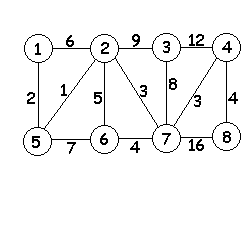 |


In [14]:
def dijkstra_shortest_path_finder(graph, start, end):
    # Аналогично, по умолчанию расстояния до вершин бесконечны.
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    # Множество посещенных вершин
    visited = set()

    while True:
        # На каждом шаге выбираем ближайшую вершину
        current_distance, current_node = min((distances[node], node) for node in graph if node not in visited)
        visited.add(current_node)

        # Если наткнулись на конечную вершину, то возвращаем пройденное расстояние
        if current_node == end:
            return current_distance

        # Вычисляем расстояния до новых вершин
        for neighbor, weight in graph[current_node].items():
            distance = distances[current_node] + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance


my_graph = {
    1: {2: 6,
        5: 2},
    2: {1: 6,
        3: 9,
        5: 1,
        6: 5,
        7: 3},
    3: {2: 9,
        4: 12,
        7: 8},
    4: {3: 12,
        7: 3,
        8: 4},
    5: {1: 2,
        2: 1,
        6: 7},
    6: {2: 5,
        5: 7,
        7: 4},
    7: {2: 3,
        3: 8,
        4: 3,
        6: 4,
        8: 16},
    8: {4: 4,
        7: 16}
}

my_args = my_graph, 3, 7
print(f"Shortest path from {my_args[1]} to {my_args[2]}:", dijkstra_shortest_path_finder(*my_args))

Shortest path from 3 to 7: 8


#### Задание 4.
Реализовать программно один из алгоритмов поиска кратчайшего пути на графе между парами вершин из задания 3.

In [38]:
class Graph:
    def __init__(self, nodes_count):
        self.nodes = nodes_count  # Количество вершин в графе
        self.graph = []  # Сам граф реализуется как совокупность связей между вершинами

    def add_direct_link(self, first, second, weight):
        self.graph.append([first - 1, second - 1, weight])

    def add_bidirect_link(self, first, second, weight):
        self.add_direct_link(first, second, weight)
        self.add_direct_link(second, first, weight)

    def print_node_distances(self, distances, start_node_index):
        for i, distance in enumerate(distances):
            print(f"Distance from node ({start_node_index + 1}) to node ({i + 1}): {distances[i]}")

    def bellman_ford(self, start_node):
        start_node -= 1  # Первая вершина имеет нулевой индекс, вторая - первый и т.д.
        distances = [float("Inf")] * self.nodes
        distances[start_node] = 0

        for _ in range(self.nodes - 1):
            for first, second, weight in self.graph:
                if distances[first] != float("Inf") and distances[first] + weight < distances[second]:
                    distances[second] = distances[first] + weight

        for first, second, weight in self.graph:
            if distances[first] != float("Inf") and distances[first] + weight < distances[second]:
                print("Graph contains negative weight cycle")
                return

        self.print_node_distances(distances, start_node)


g = Graph(8)
g.add_bidirect_link(1, 2, 6)
g.add_bidirect_link(1, 5, 2)
g.add_bidirect_link(2, 3, 9)
g.add_bidirect_link(2, 5, 1)
g.add_bidirect_link(2, 6, 5)
g.add_bidirect_link(2, 7, 3)
g.add_bidirect_link(3, 4, 12)
g.add_bidirect_link(3, 7, 8)
g.add_bidirect_link(4, 7, 3)
g.add_bidirect_link(4, 8, 4)
g.add_bidirect_link(5, 6, 7)
g.add_bidirect_link(6, 7, 4)
g.add_bidirect_link(7, 8, 16)

g.bellman_ford(3)

Distance from node (3) to node (1): 12
Distance from node (3) to node (2): 9
Distance from node (3) to node (3): 0
Distance from node (3) to node (4): 11
Distance from node (3) to node (5): 10
Distance from node (3) to node (6): 12
Distance from node (3) to node (7): 8
Distance from node (3) to node (8): 15
